In [91]:
import numpy as np
import pandas as pd
import hvplot.pandas
import seaborn as sns
import yfinance as yf
from pathlib import Path
from MCForecastTools import MCSimulation

In [5]:
tickers = 'SPY,AMZN,TSLA,NVDA,AAPL,BTC-USD,ETH-USD'
# tickers = ['SOL-USD']

combined_tickers_df = []
symbols = tickers.split(",")
print(symbols)

for each_ticker in symbols:
        data = yf.download(
                each_ticker,
                start="2017-02-17", end="2022-02-17"
        )
        data = data.dropna().drop(columns=['Open','High','Low','Close','Volume'])
        data = data.rename(columns = {'Adj Close' : each_ticker})
        # print(data)
        data.to_csv(f'./test_files/{each_ticker}.csv')
        combined_tickers_df.append(data)



['SPY', 'AMZN', 'TSLA', 'NVDA', 'AAPL', 'BTC-USD', 'ETH-USD']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
combined_df = pd.concat(combined_tickers_df, axis="columns", join="inner")

display(combined_df.head())
display(combined_df.tail())

,SPY,AMZN,TSLA,NVDA,AAPL,BTC-USD,ETH-USD
Date,,,,,,,
2017-11-09,239.654953,1129.130005,60.598000,50.824322,41.849770,7143.580078,320.884003
2017-11-10,239.580688,1125.349976,60.598000,53.502666,41.711266,6618.140137,299.252991
2017-11-13,239.803452,1129.170044,63.080002,52.633808,41.544109,6559.490234,316.716003
2017-11-14,239.246506,1136.839966,61.740002,53.017502,40.916061,6635.750000,337.631012
2017-11-15,238.049011,1126.689941,62.259998,51.977840,40.376369,7315.540039,333.356995


,SPY,AMZN,TSLA,NVDA,AAPL,BTC-USD,ETH-USD
Date,,,,,,,
2022-02-10,449.320007,3180.070068,904.549988,258.239990,172.119995,43565.113281,3077.482178
2022-02-11,440.459991,3065.870117,860.000000,239.490005,168.639999,42407.937500,2927.383545
2022-02-14,439.019989,3103.340088,875.760010,242.669998,168.880005,42586.917969,2933.479004
2022-02-15,446.100006,3130.209961,922.429993,264.950012,172.789993,44575.203125,3179.877197
2022-02-16,446.600006,3162.010010,923.390015,265.109985,172.550003,43961.859375,3127.830078


In [7]:
combined_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [8]:
# Calcualte daily returns
daily_returns = combined_df.pct_change().dropna()
daily_returns.head()

,SPY,AMZN,TSLA,NVDA,AAPL,BTC-USD,ETH-USD
Date,,,,,,,
2017-11-10,-0.000310,-0.003348,0.000000,0.052698,-0.003310,-0.073554,-0.067411
2017-11-13,0.000930,0.003395,0.040958,-0.016240,-0.004007,-0.008862,0.058355
2017-11-14,-0.002323,0.006793,-0.021243,0.007290,-0.015118,0.011626,0.066037
2017-11-15,-0.005005,-0.008928,0.008422,-0.019610,-0.013190,0.102444,-0.012659
2017-11-16,0.008501,0.009408,0.003855,0.007762,0.011947,0.076023,-0.007298


In [6]:
columns = daily_returns.columns.tolist()
beta = []
for each_column in columns:
    if each_column != columns[0]:
        covariance = daily_returns[each_column].cov(daily_returns[columns[0]])
        variance = daily_returns[columns[0]].var()
        calc_beta = covariance / variance
        beta.append(calc_beta)
        print(each_column, beta)

AMZN [0.9681194002129591]
TSLA [0.9681194002129591, 1.3841905641947299]
NVDA [0.9681194002129591, 1.3841905641947299, 1.6329579030898926]
AAPL [0.9681194002129591, 1.3841905641947299, 1.6329579030898926, 1.2307911965367788]
BTC-USD [0.9681194002129591, 1.3841905641947299, 1.6329579030898926, 1.2307911965367788, 0.7775652504473078]
ETH-USD [0.9681194002129591, 1.3841905641947299, 1.6329579030898926, 1.2307911965367788, 0.7775652504473078, 1.139518195135925]


In [9]:
# Portfolio calculations
weights = [0.1, 0.1, 0.1, 0.08, 0.08, 0.04, 0.5]
# weight == 1, elements in the list 
# if weights > 1:
#     print(f"The portfolio weights must equal to 1. Please try again.")
    
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2017-11-10   -0.033062
2017-11-13    0.031732
2017-11-14    0.031180
2017-11-15   -0.005407
2017-11-16    0.003145
dtype: float64

In [10]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

Date
2017-11-10    0.966938
2017-11-13    0.997620
2017-11-14    1.028726
2017-11-15    1.023164
2017-11-16    1.026382
dtype: float64

In [11]:
# Plot the returns of the portfolio in terms of money
initial_investment = 5000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.hvplot()

:Curve   [Date]   (0)

In [12]:
# Use the `corr` function to calculate the correlation between stock returns
pct_change_correlation = daily_returns.corr()
pct_change_correlation

,SPY,AMZN,TSLA,NVDA,AAPL,BTC-USD,ETH-USD
SPY,1.000000,0.623189,0.438446,0.686509,0.777470,0.206819,0.233823
AMZN,0.623189,1.000000,0.383976,0.610914,0.631267,0.145448,0.156152
TSLA,0.438446,0.383976,1.000000,0.426158,0.423195,0.121570,0.137499
NVDA,0.686509,0.610914,0.426158,1.000000,0.632881,0.183433,0.200862
AAPL,0.777470,0.631267,0.423195,0.632881,1.000000,0.156244,0.184456
BTC-USD,0.206819,0.145448,0.121570,0.183433,0.156244,1.000000,0.729538
ETH-USD,0.233823,0.156152,0.137499,0.200862,0.184456,0.729538,1.000000


In [13]:
# Calculate the correlation of closing prices between MSFT and SP500
price_correlation = combined_df.corr()

<AxesSubplot:>

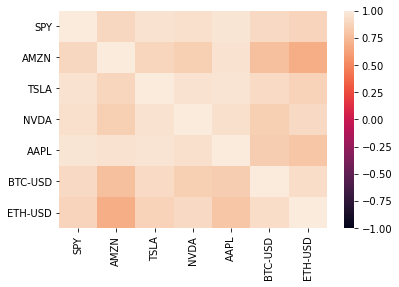

In [14]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=-1, vmax=1)

In [15]:
# Calculate the correlation between each column
price_correlation

,SPY,AMZN,TSLA,NVDA,AAPL,BTC-USD,ETH-USD
SPY,1.000000,0.897977,0.950678,0.940816,0.965997,0.901429,0.878757
AMZN,0.897977,1.000000,0.887780,0.851461,0.946002,0.766283,0.684065
TSLA,0.950678,0.887780,1.000000,0.951370,0.959400,0.909771,0.873194
NVDA,0.940816,0.851461,0.951370,1.000000,0.938933,0.851491,0.904282
AAPL,0.965997,0.946002,0.959400,0.938933,1.000000,0.842033,0.799456
BTC-USD,0.901429,0.766283,0.909771,0.851491,0.842033,1.000000,0.923301
ETH-USD,0.878757,0.684065,0.873194,0.904282,0.799456,0.923301,1.000000


In [16]:
# Alternatively, sum total correlation for each stock
price_correlation.sum(axis=0).sort_values()

AMZN       6.033567
ETH-USD    6.063055
BTC-USD    6.194309
NVDA       6.438354
AAPL       6.451820
TSLA       6.532193
SPY        6.535655
dtype: float64

In [17]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = daily_returns.drop(columns=['SPY', 'ETH-USD'])
noncorrelated_daily_returns.head()

,AMZN,TSLA,NVDA,AAPL,BTC-USD
Date,,,,,
2017-11-10,-0.003348,0.000000,0.052698,-0.003310,-0.073554
2017-11-13,0.003395,0.040958,-0.016240,-0.004007,-0.008862
2017-11-14,0.006793,-0.021243,0.007290,-0.015118,0.011626
2017-11-15,-0.008928,0.008422,-0.019610,-0.013190,0.102444
2017-11-16,0.009408,0.003855,0.007762,0.011947,0.076023


In [18]:
# Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

AMZN       0.918690
TSLA       1.311394
NVDA       1.042100
AAPL       1.188537
BTC-USD    0.943185
dtype: float64

In [19]:
# Drop the lowest sharpe ratio stocks and keep only the positive sharpe ratio stocks
# candidate_daily_returns = noncorrelated_daily_returns.drop(columns=['T', 'WDC', 'FANG'])
# candidate_daily_returns.head()

### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

In [20]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $5,000 Investment Over Time for Optimized Portfolio
initial_investment = 5000
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
candidate_portfolio_returns = noncorrelated_daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.hvplot(figsize=(20,10))

:Curve   [Date]   (0)

### Evaluate Investment in Non-Correlated (Diversified) Portfolio

In [21]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 5000
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
noncorrelated_portfolio_returns = noncorrelated_daily_returns.dot(weights)
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)
noncorrelated_cumulative_profits.hvplot(figsize=(20,10))

:Curve   [Date]   (0)

### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

In [22]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio
initial_investment = 5000
weights = [0.142857, 0.142857, 0.142857, 0.142857, 0.142857, 0.142857, 0.142857]
unoptimized_portfolio_returns = daily_returns.dot(weights)
unoptimized_cumulative_returns = (1 + unoptimized_portfolio_returns).cumprod()
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_returns)
unoptimized_cumulative_profits.hvplot(figsize=(20,10))

:Curve   [Date]   (0)

### Overlay Hypothetical Portfolio Investments

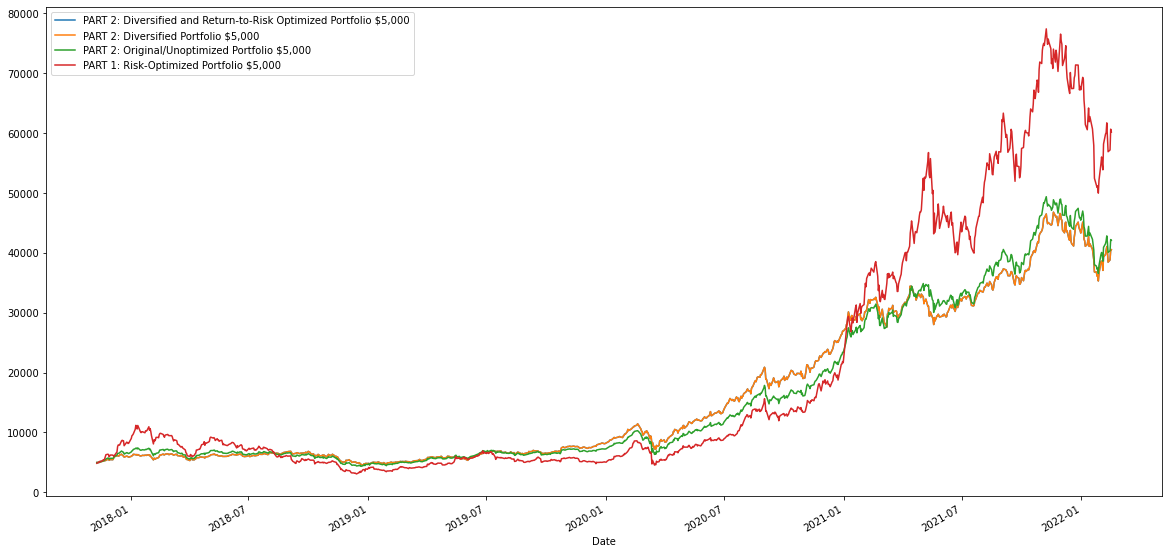

In [23]:
# Set the figure of the chart and plot each data trend on the single figure
ax = candidate_cumulative_profits.plot(figsize=(20,10))
noncorrelated_cumulative_profits.plot(ax=ax)
unoptimized_cumulative_profits.plot(ax=ax)
cumulative_profit.plot(ax=ax)

ax.legend(['PART 2: Diversified and Return-to-Risk Optimized Portfolio $5,000', 
           'PART 2: Diversified Portfolio $5,000', 
           'PART 2: Original/Unoptimized Portfolio $5,000', 
           'PART 1: Risk-Optimized Portfolio $5,000'])

In [108]:
mc_assets = ['SPY','AMZN','TSLA','NVDA','AAPL','BTC-USD','ETH-USD']
combined_data = []
individual_data = {}
for each_asset in mc_assets:
    data = yf.download(
        each_asset,
        start="2017-02-17", end="2022-02-17"
    )
    data = data.dropna()#.drop(columns=['Open','High','Low','Close','Volume'])
    # data = data.rename(columns = {'Adj Close' : each_ticker})
    # print(data)
    # data.to_csv(f'./test_files/{each_ticker}.csv')
    data = data.rename(columns={'Close':'close'})
    combined_data.append(data)
    individual_data[each_asset] = data

combined_mc_data = pd.concat(combined_data, axis="columns", join="inner")

display(combined_mc_data.head())
display(combined_mc_data.tail())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,close,Adj Close,Volume,Open,High,Low,close,...,Low,close,Adj Close,Volume,Open,High,Low,close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09,257.730011,258.390015,256.359985,258.170013,239.654938,95085500,1125.959961,1129.619995,1115.770020,1129.130005,...,7101.520020,7143.580078,7143.580078,3226249984,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,257.730011,258.290009,257.369995,258.089996,239.580688,59984700,1126.099976,1131.750000,1124.060059,1125.349976,...,6436.870117,6618.140137,6618.140137,5208249856,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-13,257.309998,258.589996,257.269989,258.329987,239.803452,50228600,1123.000000,1139.900024,1122.339966,1129.170044,...,5844.290039,6559.490234,6559.490234,6263249920,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
2017-11-14,257.410004,257.850006,256.519989,257.730011,239.246475,61315200,1130.109985,1138.000000,1123.890015,1136.839966,...,6461.750000,6635.750000,6635.750000,3197110016,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
2017-11-15,256.619995,257.220001,255.630005,256.440002,238.048996,80811500,1127.010010,1131.750000,1121.630005,1126.689941,...,6634.759766,7315.540039,7315.540039,4200880128,337.963989,340.911987,329.812988,333.356995,333.356995,722665984


,Open,High,Low,close,Adj Close,Volume,Open,High,Low,close,...,Low,close,Adj Close,Volume,Open,High,Low,close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,451.339996,457.709991,447.200012,449.320007,449.320007,140103700,3167.000000,3214.330078,3155.000000,3180.070068,...,43402.808594,43565.113281,43565.113281,32142048537,3240.113037,3271.316162,3070.378174,3077.482178,3077.482178,18629485080
2022-02-11,449.410004,451.609985,438.940002,440.459991,440.459991,153064100,3162.689941,3180.000000,3054.679932,3065.870117,...,42114.539062,42407.937500,42407.937500,26954925781,3077.413086,3127.450684,2888.707764,2927.383545,2927.383545,16043881065
2022-02-14,439.920013,441.600006,435.339996,439.019989,439.019989,122062800,3035.020020,3168.969971,3033.000000,3103.340088,...,41681.957031,42586.917969,42586.917969,20827783012,2880.187744,2957.963623,2840.257568,2933.479004,2933.479004,12164552172
2022-02-15,443.730011,446.279999,443.179993,446.100006,446.100006,88659500,3152.110107,3160.139893,3092.750000,3130.209961,...,42491.035156,44575.203125,44575.203125,22721659051,2933.729004,3185.520752,2917.857178,3179.877197,3179.877197,13921257873
2022-02-16,443.929993,448.059998,441.940002,446.600006,446.600006,84863600,3115.810059,3176.679932,3094.689941,3162.010010,...,43456.691406,43961.859375,43961.859375,19792547657,3180.446777,3181.616943,3055.168213,3127.830078,3127.830078,12352406833


In [117]:
#individual_data['SPY'].head()
#combined_mc_data_new = pd.concat([combined_mc_data, ], keys=['SPY','AMZN','TSLA','NVDA','AAPL','BTC-USD','ETH-USD'], axis=1)
combined_mc_data_new = pd.concat([
  individual_data['SPY'],
  individual_data['AMZN'],
  individual_data['TSLA'],
  individual_data['NVDA'],
  individual_data['AAPL'],
  individual_data['BTC-USD'],
  individual_data['ETH-USD'],
], keys=['SPY','AMZN','TSLA','NVDA','AAPL','BTC-USD','ETH-USD'], axis=1)

combined_mc_data_new.dropna(inplace=True)
combined_mc_data_new.head()

SPY                                                  \
                  Open        High         Low       close   Adj Close   
Date                                                                     
2017-11-09  257.730011  258.390015  256.359985  258.170013  239.654938   
2017-11-10  257.730011  258.290009  257.369995  258.089996  239.580688   
2017-11-13  257.309998  258.589996  257.269989  258.329987  239.803452   
2017-11-14  257.410004  257.850006  256.519989  257.730011  239.246475   
2017-11-15  256.619995  257.220001  255.630005  256.440002  238.048996   

                               AMZN                                         \
                Volume         Open         High          Low        close   
Date                                                                         
2017-11-09  95085500.0  1125.959961  1129.619995  1115.770020  1129.130005   
2017-11-10  59984700.0  1126.099976  1131.750000  1124.060059  1125.349976   
2017-11-13  50228600.0  1123.000000  1139.900024  1122.339966  1129.170044   
2017-11-14  61315200.0  1130.109985  1138.000000  1123.890015  1136.839966   
2017-11-15  80811500.0  1127.010010  1131.750000  1121.630005  1126.689941   

            ...      BTC-USD                                        \
            ...          Low        close    Adj Close      Volume   
Date        ...                                                      
2017-11-09  ...  7101.520020  7143.580078  7143.580078  3226249984   
2017-11-10  ...  6436.870117  6618.140137  6618.140137  5208249856   
2017-11-13  ...  5844.290039  6559.490234  6559.490234  6263249920   
2017-11-14  ...  6461.750000  6635.750000  6635.750000  3197110016   
2017-11-15  ...  6634.759766  7315.540039  7315.540039  4200880128   

               ETH-USD                                                  \
                  Open        High         Low       close   Adj Close   
Date                                                                     
2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   

                          
                  Volume  
Date                      
2017-11-09  8.932500e+08  
2017-11-10  8.859860e+08  
2017-11-13  1.041890e+09  
2017-11-14  1.069680e+09  
2017-11-15  7.226660e+08  

[5 rows x 42 columns]

In [127]:
simulation = MCSimulation(
    portfolio_data = combined_mc_data_new_clean,
    weights = [0.142857, 0.142857, 0.142857, 0.142857, 0.142857, 0.142857, 0.142857],
    num_simulation = 250,
    num_trading_days = 252*10,
)

In [128]:
simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\nickd\Documents\GitHub\grayscale_analysis\test\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991664,1.008621,0.999735,0.969799,1.002603,1.020145,0.976073,0.999647,1.007544,1.010021,...,0.994139,0.990687,0.995479,1.009223,0.970374,0.985878,1.009021,0.994171,1.017114,0.977383
2,0.988132,1.020917,1.026733,0.960353,0.988611,1.025446,0.991764,0.991014,1.002104,1.007857,...,0.999786,0.996880,1.009948,1.001052,0.958546,0.992169,1.015007,1.003429,1.002692,0.980192
3,0.991696,1.048454,1.018933,0.979212,0.980827,1.020512,1.011857,0.989180,1.013389,1.020082,...,1.024016,1.001070,1.011512,1.004113,0.985423,0.997752,1.009694,1.020952,0.985885,0.975250
4,0.983680,1.038148,1.036968,0.971109,0.968990,1.049097,1.002541,0.999578,1.010130,1.031387,...,1.010729,0.970367,0.995314,0.994817,1.003282,0.984155,0.987219,1.021844,0.990823,0.991914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,57.920906,293.252796,260.847789,52.201372,524.056202,103.739763,396.323277,356.443178,694.617789,225.822624,...,367.981194,173.056748,94.325068,1468.516212,154.497808,213.166074,297.668674,71.672258,126.313892,195.754213
2517,58.388931,295.478777,259.795240,51.083445,523.972084,105.587621,395.596548,357.404956,690.334178,229.629776,...,365.226245,176.924666,95.267897,1464.009513,157.183962,214.121187,297.645165,72.338825,127.891674,195.731262
2518,58.661660,299.046179,254.922091,50.970745,516.842227,105.524988,401.230621,360.169613,698.473069,230.733329,...,365.982047,178.511175,94.438123,1447.913747,157.119840,215.223878,294.441281,72.642690,126.769567,199.376822
2519,59.463243,303.037993,258.196088,50.840326,525.491904,105.852585,398.733132,360.660659,700.210747,232.643372,...,367.622210,173.641578,94.627934,1475.850702,158.314994,215.141455,291.989186,72.367236,127.695199,198.041457


count            250.000000
mean             279.073928
std              214.193730
min               23.539091
25%              133.723712
50%              230.439640
75%              334.089799
max             1475.143423
95% CI Lower      52.897782
95% CI Upper     908.724992
Name: 2520, dtype: float64

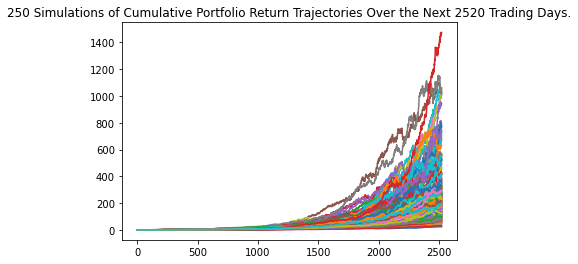

In [129]:
simulation.plot_simulation()

simulation_summary = simulation.summarize_cumulative_return()
display(simulation_summary)